In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#etf_tickers = ['SETFNIF50.NS', 'ICICINIFTY.NS','HDFCNIFTY.NS','AXISNIFTY.NS']
etf_tickers = ['SETFNIF50.NS', 'AXISNIFTY.NS', 'NIFTYBEES.NS','ICICINIFTY.NS']

In [ ]:
end_date = datetime.today().date()-timedelta(days=120)
start_date = end_date - timedelta(days=1000)

def fetch_data(ticker):
    stock=yf.Ticker(ticker)
    df=stock.history(start=start_date, end=end_date)
    return df[['Open', 'Close', 'High', 'Low','Dividends']]

HISTORICAL CLOSE PRICE

In [ ]:
def log_returns(df,time):
  if time!=0:
      arr=np.array(df)
      curr_cp=arr[time][1]
      curr_div=arr[time][4]
      prev_cp=arr[time-1][1]
      return np.log((curr_cp+curr_div)/prev_cp)
  else:
    return None

def HV_estimate(df):
  arr=np.array(df)
  days=arr.shape[0]
  sum_var=0
  for i in range(days-1):
    sum_var+=(log_returns(df,i+1))**2
  return np.sqrt(sum_var/(days-2))

'''def sequential_HV(df,days):
  last_day=df.shape[0]
  start_index=df.shape[0]-2*days+1
  end_index=start_index+days
  L=[]
  while end_index<=last_day:
    df_slice=df.iloc[start_index:end_index]
    L.append(HV_estimate(df_slice))
    start_index+=1
    end_index+=1
  return L'''
def sequential_HV(df,days,window_size):
  last_day=df.shape[0]
  start_index=df.shape[0]-days-window_size+1
  end_index=df.shape[0]-days+1
  L=[]
  while end_index<=last_day:
    df_slice=df.iloc[start_index:end_index]
    L.append(HV_estimate(df_slice))
    start_index+=1
    end_index+=1
  return L

RANGE-BASED PARKINSON

In [ ]:
def var_park(df):
  arr=np.array(df)
  days=arr.shape[0]
  sum_var=0
  for i in range(days):
    r=np.log(arr[i][2]/arr[i][3])
    sum_var+=r**2
  return np.sqrt(sum_var/(4*np.log(2)))
'''def sequential_var_park(df,days):
  last_day=df.shape[0]
  start_index=df.shape[0]-2*days+1
  end_index=start_index+days
  L=[]
  while end_index<=last_day:
    df_slice=df.iloc[start_index:end_index]
    L.append(var_park(df_slice))
    start_index+=1
    end_index+=1
  return L'''
def sequential_var_park(df,days,window_size):
  last_day=df.shape[0]
  start_index=df.shape[0]-days-window_size+1
  end_index=df.shape[0]-days+1
  L=[]
  while end_index<=last_day:
    df_slice=df.iloc[start_index:end_index]
    L.append(var_park(df_slice) / window_size)
    start_index+=1
    end_index+=1
  return L

EWMA-Exponentially Weighted Moving Average

In [ ]:
def var_EWMA(df,alpha):
  arr=np.array(df)
  days=arr.shape[0]
  sum_var=0
  exp=0
  for i in range(days-1,0,-1):
    r=np.log((arr[i][1]+arr[i][4])/arr[i-1][1])
    sum_var+=(alpha**exp)*(r**2)
    exp+=1
  return np.sqrt((1-alpha)*sum_var)
'''def sequential_EWMA(df,alpha,days):
  last_day=df.shape[0]
  start_index=df.shape[0]-2*days+1
  end_index=start_index+days
  L=[]
  while end_index<=last_day:
    df_slice=df.iloc[start_index:end_index]
    L.append(var_EWMA(df_slice,alpha))
    start_index+=1
    end_index+=1
  return L'''

def sequential_EWMA(df,alpha,days,window_size):
  last_day=df.shape[0]
  start_index=df.shape[0]-days-window_size+1
  end_index=df.shape[0]-days+1
  L=[]
  while end_index<=last_day:
    df_slice=df.iloc[start_index:end_index]
    L.append(var_EWMA(df_slice,alpha))
    start_index+=1
    end_index+=1
  return L

In [ ]:
df=fetch_data(etf_tickers[3])
days=10
window_size=3
last_day=df.shape[0]
start_index=df.shape[0]-days-window_size+1
end_index=df.shape[0]-days+1
while end_index<=last_day:
  df_new=df.iloc[start_index:end_index]
  print(df_new['Close'])
  start_index+=1
  end_index+=1

Date
2023-12-04 00:00:00+05:30    226.949997
2023-12-05 00:00:00+05:30    228.639999
2023-12-06 00:00:00+05:30    229.639999
Name: Close, dtype: float64
Date
2023-12-05 00:00:00+05:30    228.639999
2023-12-06 00:00:00+05:30    229.639999
2023-12-07 00:00:00+05:30    229.399994
Name: Close, dtype: float64
Date
2023-12-06 00:00:00+05:30    229.639999
2023-12-07 00:00:00+05:30    229.399994
2023-12-08 00:00:00+05:30    230.089996
Name: Close, dtype: float64
Date
2023-12-07 00:00:00+05:30    229.399994
2023-12-08 00:00:00+05:30    230.089996
2023-12-11 00:00:00+05:30    230.330002
Name: Close, dtype: float64
Date
2023-12-08 00:00:00+05:30    230.089996
2023-12-11 00:00:00+05:30    230.330002
2023-12-12 00:00:00+05:30    229.369995
Name: Close, dtype: float64
Date
2023-12-11 00:00:00+05:30    230.330002
2023-12-12 00:00:00+05:30    229.369995
2023-12-13 00:00:00+05:30    229.649994
Name: Close, dtype: float64
Date
2023-12-12 00:00:00+05:30    229.369995
2023-12-13 00:00:00+05:30    229.6499

# Plots

In [ ]:
dfPlot = fetch_data(etf_tickers[2])
EWMA_plot = sequential_EWMA(dfPlot,0.94,300,10)
ewvPlot = sequential_var_park(dfPlot, 300,10)
column = ['EWMA']
column2 = ['Range Based Parkinson']
EWMA_plot = pd.DataFrame(EWMA_plot, columns = column)
ewvPlot = pd.DataFrame(ewvPlot, columns = column2)
dfPlot = dfPlot.iloc[-300:, :]
dfPlot = dfPlot.iloc[-50:, :]
ewvPlot = ewvPlot.iloc[-50:, :]
EWMA_plot = EWMA_plot.iloc[-50:, :]

print(dfPlot.shape)
print(EWMA_plot.shape)
print(ewvPlot.shape)

(50, 5)
(50, 1)
(50, 1)


0.007921039446898575
0.0056240502943078335


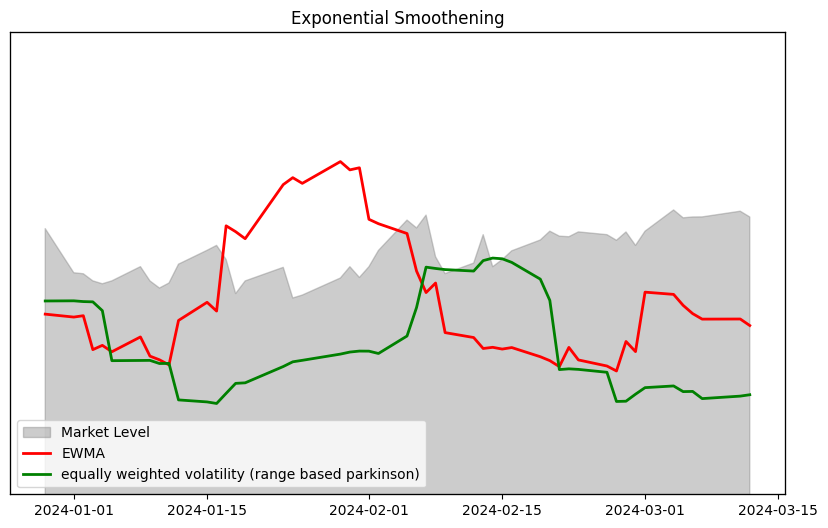

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
#marketLevel = ax1.plot(dfPlot.index, dfPlot['High'], color='grey', linestyle='dashdot', linewidth=2, markersize=8,label='Market Level')
marketLevel = ax1.fill_between(dfPlot.index, dfPlot['High'], color='grey', alpha=0.4, label = 'Market Level')
ax2 = ax1.twinx()
ax3 = ax1.twinx()
EWMA = ax2.plot(dfPlot.index, EWMA_plot['EWMA'], color='r', linestyle='-', linewidth=2, markersize=8, label='EWMA')
ewv = ax3.plot(dfPlot.index, ewvPlot['Range Based Parkinson'], color='g', linestyle='-', linewidth=2, markersize=8, label='equally weighted volatility (range based parkinson)')

ax1.set_ylim(min(dfPlot['Low'])*0.9, max(dfPlot['High']) * 1.1)
#ax2.set_ylim(min(EWMA_plot['EWMA'])*0.85, max(EWMA_plot['EWMA']) * 1.15)
#ax3.set_ylim(min(ewvPlot['Range Based Parkinson'])*0.85, max(ewvPlot['Range Based Parkinson']) * 1.15)

ax2.set_ylim(0, 0.011)
ax3.set_ylim(0, 0.011)
print(max(EWMA_plot['EWMA']))
print(max(ewvPlot['Range Based Parkinson']))

# Set labels and title
ax1.set_ylabel('')
ax1.set_title('Exponential Smoothening')
ax1.set_yticks([])
ax2.set_yticks([])
ax2.set_ylabel('')
ax3.set_yticks([])
ax3.set_ylabel('')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='lower left')

plt.show()

# Garch

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model
#from arch import GARCH

In [ ]:
def calculate_garch_volatility(df):
    """
    Calculate the volatility of a stock using the GARCH model.

    Parameters:
    df (pd.DataFrame): DataFrame containing the columns 'Open', 'Close', 'High', 'Low', 'Dividends'

    Returns:
    pd.Series: Estimated volatility of the stock
    """
    # Calculate the log returns of the closing prices
    df['Log_Returns'] = np.log(df['Close']).diff().dropna()

    # Define and fit the GARCH model
    model = arch_model(df['Log_Returns'].dropna(), vol='Garch', p=1, q=1)
    garch_result = model.fit(disp="off")

    # Extract conditional volatility
    volatility = garch_result.conditional_volatility

    return volatility

In [ ]:
market = fetch_data(etf_tickers[0])['Close']
#print(market)
returns = 100 * market.pct_change().dropna()
print(returns)
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
#res = am.fit(update_freq=5)

Date
2021-06-18 00:00:00+05:30   -0.131509
2021-06-21 00:00:00+05:30    0.307252
2021-06-22 00:00:00+05:30    0.093764
2021-06-23 00:00:00+05:30   -0.380965
2021-06-24 00:00:00+05:30    0.683350
                               ...   
2024-03-05 00:00:00+05:30   -0.286141
2024-03-06 00:00:00+05:30    0.642453
2024-03-07 00:00:00+05:30   -0.004253
2024-03-11 00:00:00+05:30   -0.697961
2024-03-12 00:00:00+05:30    0.094288
Name: Close, Length: 677, dtype: float64


In [ ]:
import datetime as dt
import sys

import arch.data.sp500
import numpy as np
import pandas as pd
from arch import arch_model

data = arch.data.sp500.load()
market1 = data["Adj Close"]
returns = 100 * market1.pct_change().dropna()
print(returns)

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
                ...   
2018-12-24   -2.711225
2018-12-26    4.959374
2018-12-27    0.856268
2018-12-28   -0.124158
2018-12-31    0.849248
Name: Adj Close, Length: 5030, dtype: float64


In [ ]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11


In [ ]:
def calculate_garch_volatility(df):
  df['Log_Returns'] = np.log(df['Close']).diff().dropna()
  model = arch_model(df['Log_Returns'].dropna(), vol='Garch', p=1, q=1)
  garch_result = model.fit(disp="off")
  volatility = garch_result.conditional_volatility
  return volatility

In [ ]:
market = fetch_data(etf_tickers[0])['Close']
#print(market)
returns = 100 * market.pct_change().dropna()
#print(returns)
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
#print(am)
res = am.fit(update_freq=5)
forecasts = res.forecast()
print(forecasts)
print(forecasts.mean)
print(calculate_garch_volatility(fetch_data(etf_tickers[0])))

Iteration:      5,   Func. Count:     33,   Neg. LLF: 23458.46759114807
Iteration:     10,   Func. Count:     65,   Neg. LLF: 765.7322998812983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 765.7322968018066
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12
                                h.1
Date                               
2024-03-12 00:00:00+05:30  0.082224
Date
2021-06-18 00:00:00+05:30    0.004467
2021-06-21 00:00:00+05:30    0.004482
2021-06-22 00:00:00+05:30    0.004499
2021-06-23 00:00:00+05:30    0.004486
2021-06-24 00:00:00+05:30    0.004593
                               ...   
2024-03-05 00:00:00+05:30    0.007361
2024-03-06 00:00:00+05:30    0.007237
2024-03-07 00:00:00+05:30    0.007182
2024-03-11 00:00:00+05:30    0.007022
2024-03-12 00:00:00+05:30    0.007086
Name: cond_vol, Length: 677, dtype: float64


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.523e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
def proxy1(close_t, close_y): # squared return
  return (close_t/close_y - 1)**2

def proxy2(high, low): # range
  return (math.log(high) - math.log(low))**2

In [ ]:
def loss_function_1(volatility, proxy): # mean squared error
  return (volatility**2 - proxy)**2

def loss_function_2(volatility, proxy): # q likelihood
  k = proxy/volatility**2
  return k - math.log(k) - 1

In [ ]:
end_date = datetime.today().date()-timedelta(days=0)
start_date = end_date - timedelta(days=50)

def fetch_data(ticker):
    stock=yf.Ticker(ticker)
    df=stock.history(start=start_date, end=end_date)
    return df[['Open', 'Close', 'High', 'Low','Dividends']]

print(etf_tickers[0])

SETFNIF50.NS


# SBI ETF

In [ ]:
setf = fetch_data(etf_tickers[0])
hv = sequential_HV(setf, 10, 10)
park = sequential_var_park(setf, 10, 10)
ewma = sequential_EWMA(setf, 0.94, 10, 10)
garch = calculate_garch_volatility(setf)

p1 = proxy1(setf['Close'][-1], setf['Close'][-2])
p2 = proxy2(setf['High'][-1], setf['Low'][-1])
print(p1)
print(p2)
#print(setf)
print(hv[-1]**2)
print(park[-1]**2)
print(ewma[-1]**2)
print(garch[-1]**2)

9.249064125119217e-06
0.00045910208586800717
1.1797716441908907e-05
7.283935862268676e-06
4.4261819124744415e-06
2.0102925393390438e-05


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001138. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
hv_value = loss_function_1(hv[-1], p1)
park_value = loss_function_1(park[-1], p1)
ewma_value = loss_function_1(ewma[-1], p1)
garch_value = loss_function_1(garch[-1], p1)

values = [hv_value, park_value, ewma_value, garch_value]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

plt.barh(labels, values)

# Add labels and title
plt.xlabel('Mean Squared return for squared return')
plt.title('Comparison of Loss Function Values')

# Show the plot
plt.show()

1.1780630443087817e-10

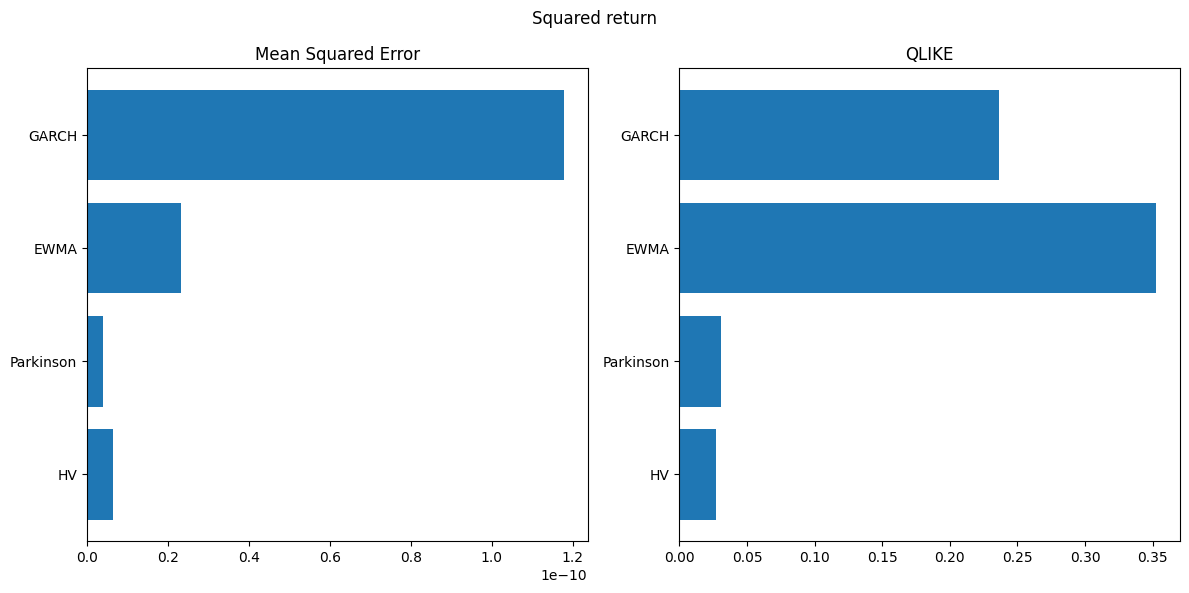

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p1)
park_value_1 = loss_function_1(park[-1], p1)
ewma_value_1 = loss_function_1(ewma[-1], p1)
garch_value_1 = loss_function_1(garch[-1], p1)

hv_value_2 = loss_function_2(hv[-1], p1)
park_value_2 = loss_function_2(park[-1], p1)
ewma_value_2 = loss_function_2(ewma[-1], p1)
garch_value_2 = loss_function_2(garch[-1], p1)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Squared return')

plt.tight_layout()

# Show the plots
plt.show()


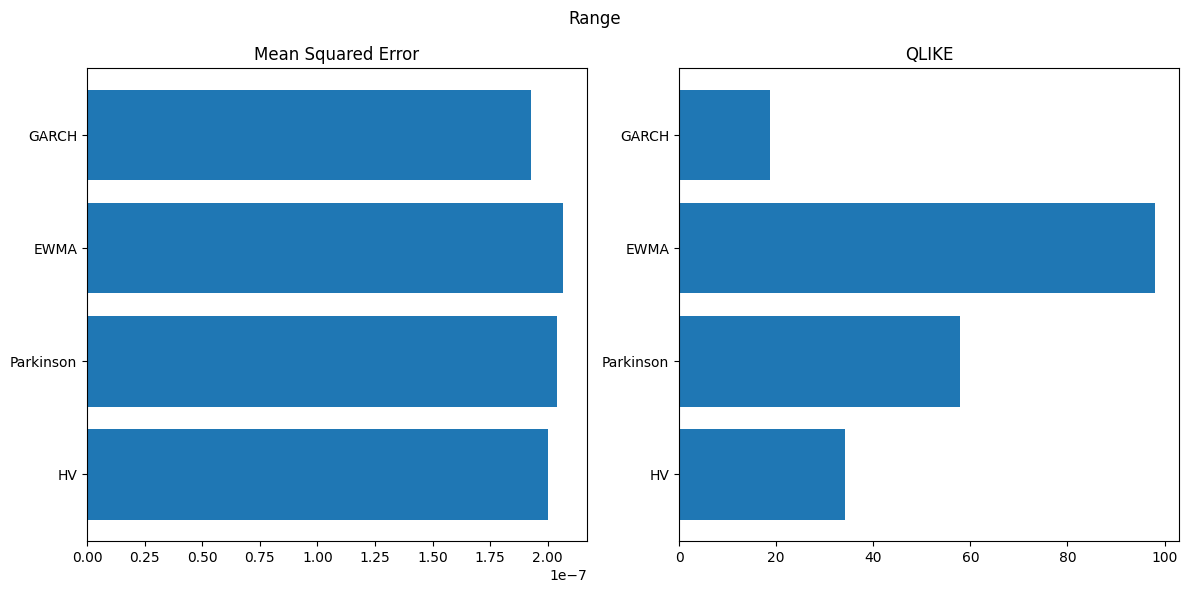

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p2)
park_value_1 = loss_function_1(park[-1], p2)
ewma_value_1 = loss_function_1(ewma[-1], p2)
garch_value_1 = loss_function_1(garch[-1], p2)

hv_value_2 = loss_function_2(hv[-1], p2)
park_value_2 = loss_function_2(park[-1], p2)
ewma_value_2 = loss_function_2(ewma[-1], p2)
garch_value_2 = loss_function_2(garch[-1], p2)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Range')

plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
setf = fetch_data(etf_tickers[1])
hv = sequential_HV(setf, 10, 10)
park = sequential_var_park(setf, 10, 10)
ewma = sequential_EWMA(setf, 0.94, 10, 10)
garch = calculate_garch_volatility(setf)

p1 = proxy1(setf['Close'][-1], setf['Close'][-2])
p2 = proxy2(setf['High'][-1], setf['Low'][-1])
print(p1)
print(p2)
#print(setf)
print(hv[-1]**2)
print(park[-1]**2)
print(ewma[-1]**2)
print(garch[-1]**2)

2.2117519752991533e-05
0.00021870131435913515
1.437631039696011e-05
1.0411777807449395e-05
5.406497000885022e-06
2.071228616101834e-05


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001316. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
hv_value = loss_function_1(hv[-1], p1)
park_value = loss_function_1(park[-1], p1)
ewma_value = loss_function_1(ewma[-1], p1)
garch_value = loss_function_1(garch[-1], p1)

values = [hv_value, park_value, ewma_value, garch_value]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

print(values)

[5.992632229390844e-11, 1.3702439449562462e-10, 2.7925828142142144e-10, 1.974681448009879e-12]


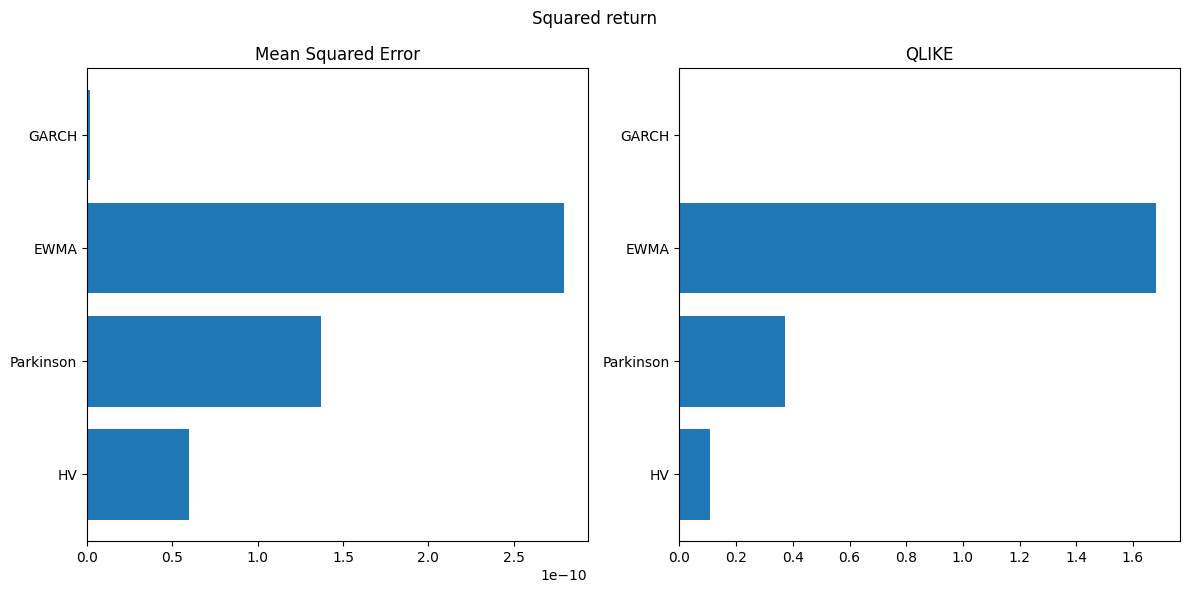

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p1)
park_value_1 = loss_function_1(park[-1], p1)
ewma_value_1 = loss_function_1(ewma[-1], p1)
garch_value_1 = loss_function_1(garch[-1], p1)

hv_value_2 = loss_function_2(hv[-1], p1)
park_value_2 = loss_function_2(park[-1], p1)
ewma_value_2 = loss_function_2(ewma[-1], p1)
garch_value_2 = loss_function_2(garch[-1], p1)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Squared return')

plt.tight_layout()

# Show the plots
plt.show()


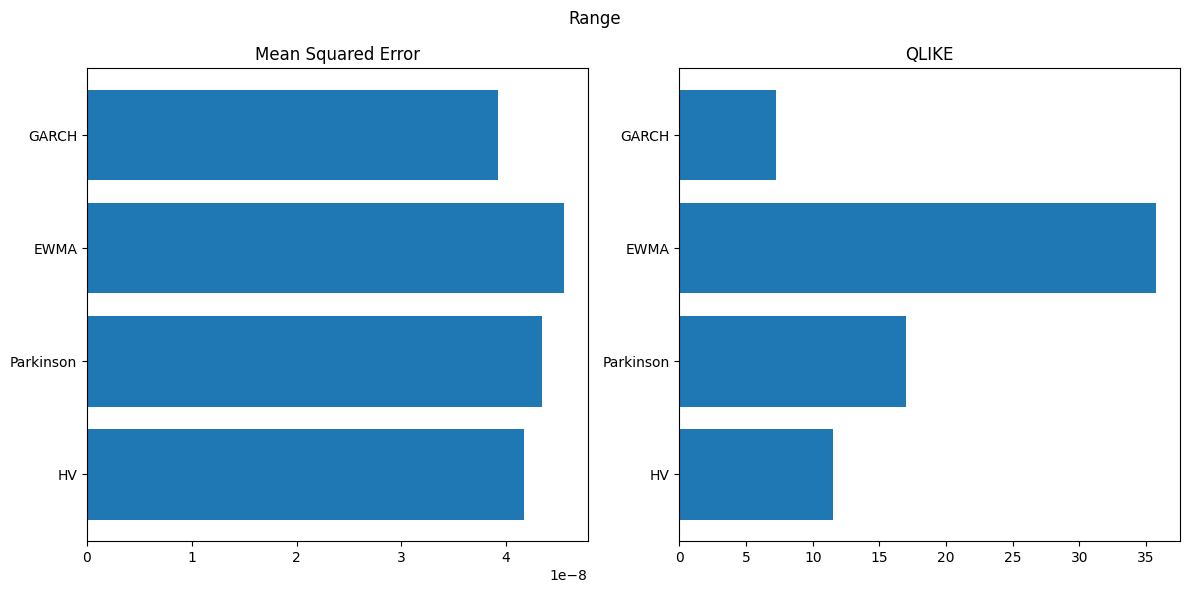

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p2)
park_value_1 = loss_function_1(park[-1], p2)
ewma_value_1 = loss_function_1(ewma[-1], p2)
garch_value_1 = loss_function_1(garch[-1], p2)

hv_value_2 = loss_function_2(hv[-1], p2)
park_value_2 = loss_function_2(park[-1], p2)
ewma_value_2 = loss_function_2(ewma[-1], p2)
garch_value_2 = loss_function_2(garch[-1], p2)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Range')

plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
setf = fetch_data(etf_tickers[2])
hv = sequential_HV(setf, 10, 10)
park = sequential_var_park(setf, 10, 10)
ewma = sequential_EWMA(setf, 0.94, 10, 10)
garch = calculate_garch_volatility(setf)

p1 = proxy1(setf['Close'][-1], setf['Close'][-2])
p2 = proxy2(setf['High'][-1], setf['Low'][-1])
print(p1)
print(p2)
#print(setf)
print(hv[-1]**2)
print(park[-1]**2)
print(ewma[-1]**2)
print(garch[-1]**2)

2.873054315638912e-06
0.00018415806727935846
9.04888970518008e-06
3.278997526308348e-06
3.4727241999973525e-06
1.5462697171482188e-05


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.776e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
hv_value = loss_function_1(hv[-1], p1)
park_value = loss_function_1(park[-1], p1)
ewma_value = loss_function_1(ewma[-1], p1)
garch_value = loss_function_1(garch[-1], p1)

values = [hv_value, park_value, ewma_value, garch_value]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

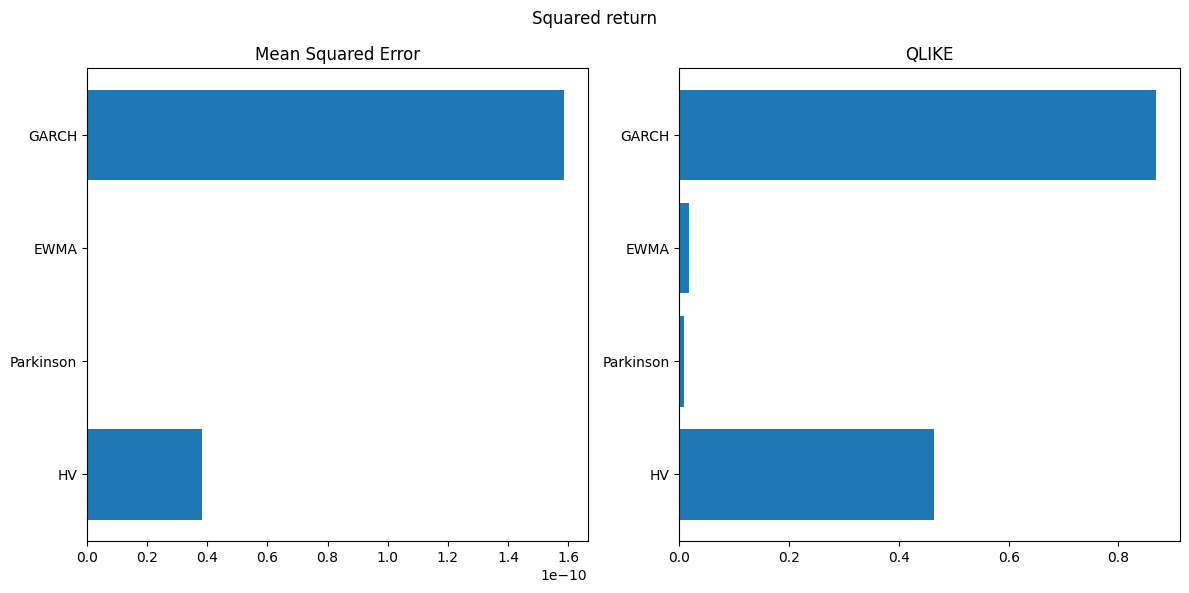

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p1)
park_value_1 = loss_function_1(park[-1], p1)
ewma_value_1 = loss_function_1(ewma[-1], p1)
garch_value_1 = loss_function_1(garch[-1], p1)

hv_value_2 = loss_function_2(hv[-1], p1)
park_value_2 = loss_function_2(park[-1], p1)
ewma_value_2 = loss_function_2(ewma[-1], p1)
garch_value_2 = loss_function_2(garch[-1], p1)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Squared return')

plt.tight_layout()

# Show the plots
plt.show()


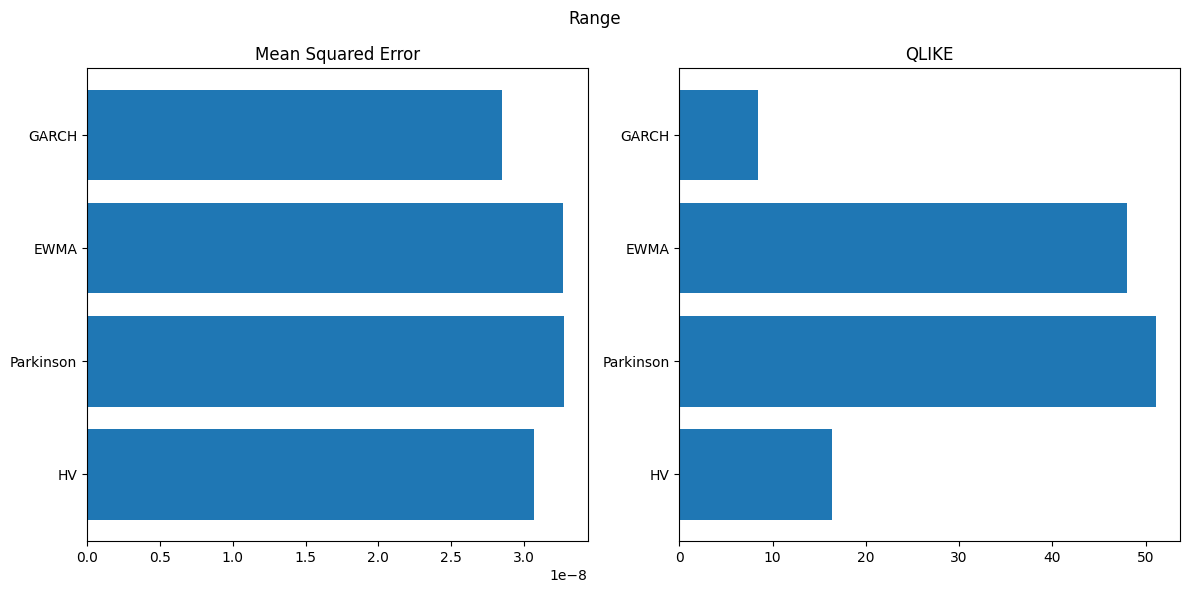

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p2)
park_value_1 = loss_function_1(park[-1], p2)
ewma_value_1 = loss_function_1(ewma[-1], p2)
garch_value_1 = loss_function_1(garch[-1], p2)

hv_value_2 = loss_function_2(hv[-1], p2)
park_value_2 = loss_function_2(park[-1], p2)
ewma_value_2 = loss_function_2(ewma[-1], p2)
garch_value_2 = loss_function_2(garch[-1], p2)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Range')

plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
setf = fetch_data(etf_tickers[3])
hv = sequential_HV(setf, 10, 10)
park = sequential_var_park(setf, 10, 10)
ewma = sequential_EWMA(setf, 0.94, 10, 10)
garch = calculate_garch_volatility(setf)

p1 = proxy1(setf['Close'][-1], setf['Close'][-2])
p2 = proxy2(setf['High'][-1], setf['Low'][-1])
print(p1)
print(p2)
#print(setf)
print(hv[-1]**2)
print(park[-1]**2)
print(ewma[-1]**2)
print(garch[-1]**2)

7.52427583807815e-06
0.0018670367597499802
9.193220925422486e-06
1.7785584445823477e-05
3.5603583078012617e-06
2.945455623600725e-05


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
hv_value = loss_function_1(hv[-1], p1)
park_value = loss_function_1(park[-1], p1)
ewma_value = loss_function_1(ewma[-1], p1)
garch_value = loss_function_1(garch[-1], p1)

values = [hv_value, park_value, ewma_value, garch_value]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']


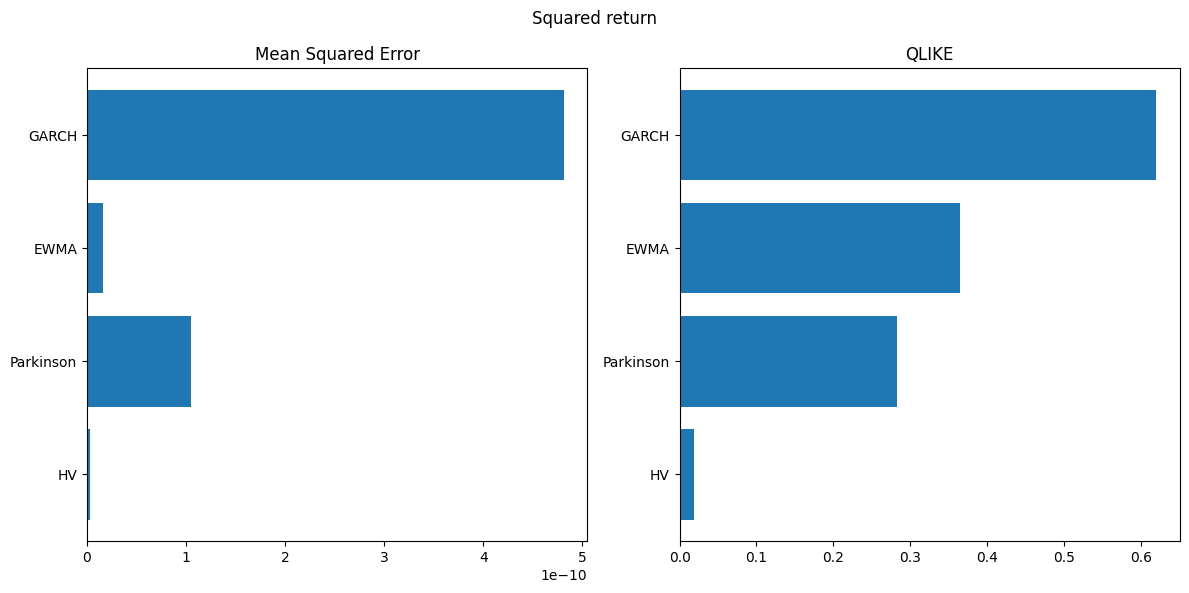

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p1)
park_value_1 = loss_function_1(park[-1], p1)
ewma_value_1 = loss_function_1(ewma[-1], p1)
garch_value_1 = loss_function_1(garch[-1], p1)

hv_value_2 = loss_function_2(hv[-1], p1)
park_value_2 = loss_function_2(park[-1], p1)
ewma_value_2 = loss_function_2(ewma[-1], p1)
garch_value_2 = loss_function_2(garch[-1], p1)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Squared return')

plt.tight_layout()

# Show the plots
plt.show()


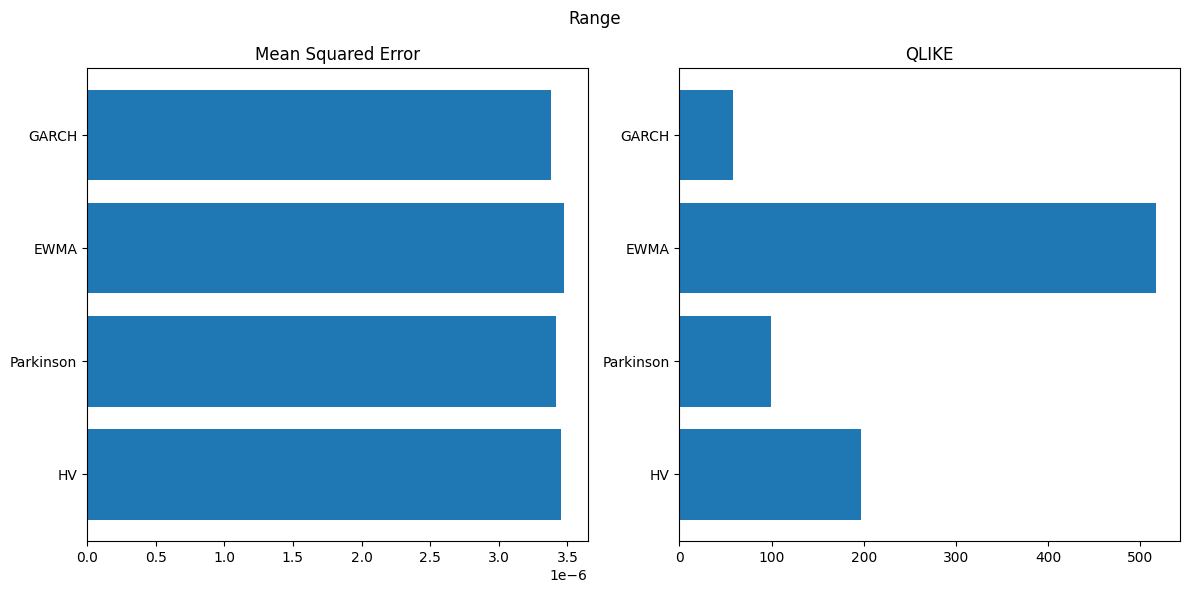

In [ ]:
hv_value_1 = loss_function_1(hv[-1], p2)
park_value_1 = loss_function_1(park[-1], p2)
ewma_value_1 = loss_function_1(ewma[-1], p2)
garch_value_1 = loss_function_1(garch[-1], p2)

hv_value_2 = loss_function_2(hv[-1], p2)
park_value_2 = loss_function_2(park[-1], p2)
ewma_value_2 = loss_function_2(ewma[-1], p2)
garch_value_2 = loss_function_2(garch[-1], p2)

values_1 = [hv_value_1, park_value_1, ewma_value_1, garch_value_1]
values_2 = [hv_value_2, park_value_2, ewma_value_2, garch_value_2]
labels = ['HV', 'Parkinson', 'EWMA', 'GARCH']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.barh(labels, values_1)
ax1.set_title('Mean Squared Error')

ax2.barh(labels, values_2)
ax2.set_title('QLIKE')
fig.suptitle('Range')

plt.tight_layout()

# Show the plots
plt.show()
